In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sklearn

dates = ['2020-04-18', '2020-04-22', '2020-04-26', '2020-04-27']
folder_path = '../../../data/accumulated-raf-data'
ob_data = []
ob_folders = os.listdir(folder_path)
for ob_folder in ob_folders:
    folders = os.listdir(folder_path + f'/{ob_folder}')
    year = '2020'
    month = '04'
    date = dates[0]
    path = folder_path + f'/{ob_folder}/{year}/{month}/{date}'
    if os.path.exists(path):
        df = pd.read_csv(path + '/data.csv', index_col='Datetime')
        ob_data.append(df)
        
test_df = ob_data[0]
#test_df.info()
test_df.head()

,RAF,RA1,RI1,ERA,CRA,AT1,RH1,PRS,SLP,WD1,WDM,WS1,WSM,WND,WNS,SOL,WET,WBG,WEA,hour-rain
Datetime,,,,,,,,,,,,,,,,,,,,
2020-04-18 T00:00 Z,0.0,0.0,0.0,0.0,0.0,29.5,50.5,1013.5,1016.4,173.0,179.0,0.4,1.4,65.0,0.2,144.0,0.0,26.6,2.0,0.0
2020-04-18 T00:01 Z,0.0,0.0,0.0,0.0,0.0,29.4,49.5,1013.5,1016.4,172.0,169.0,0.9,1.7,118.0,0.3,147.0,0.0,26.3,2.0,0.0
2020-04-18 T00:02 Z,0.0,0.0,0.0,0.0,0.0,29.4,50.3,1013.5,1016.4,177.0,180.0,0.3,1.0,126.0,0.3,151.0,0.0,26.4,2.0,0.0
2020-04-18 T00:03 Z,0.0,0.0,0.0,0.0,0.0,29.4,50.0,1013.5,1016.4,173.0,173.0,0.4,1.0,143.0,0.3,155.0,0.0,26.4,2.0,0.0
2020-04-18 T00:04 Z,0.0,0.0,0.0,0.0,0.0,29.5,50.0,1013.5,1016.4,34.0,30.0,0.1,0.4,148.0,0.3,158.0,0.0,26.5,2.0,0.0


In [2]:
test_df[["PRS", "SLP"]].describe()

,PRS,SLP
count,1440.000000,1440.000000
mean,1011.526458,1014.493750
std,1.249428,1.247297
min,1008.700000,1011.600000
25%,1010.700000,1013.700000
50%,1011.600000,1014.600000
75%,1012.400000,1015.400000
max,1013.800000,1016.700000


In [2]:
cols = ["AT1", "RH1", "PRS", "SLP", "SOL", "hour-rain"]
mag = [10, 10, 1000, 1000, 1, 1]
count = 0
for col in cols:
    log_col = col + "-LOG"
    for df in ob_data:
        df[log_col] = np.log((df[col] + 1)/(df[col].shift(1) + 1)) * mag[count]
    count+=1
ob_data[0].head()

,RAF,RA1,RI1,ERA,CRA,AT1,RH1,PRS,SLP,WD1,...,WET,WBG,WEA,hour-rain,AT1-LOG,RH1-LOG,PRS-LOG,SLP-LOG,SOL-LOG,hour-rain-LOG
Datetime,,,,,,,,,,,,,,,,,,,,,
2020-04-18 T00:00 Z,0.0,0.0,0.0,0.0,0.0,29.5,50.5,1013.5,1016.4,173.0,...,0.0,26.6,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-18 T00:01 Z,0.0,0.0,0.0,0.0,0.0,29.4,49.5,1013.5,1016.4,172.0,...,0.0,26.3,2.0,0.0,-0.032841,-0.196085,0.0,0.0,0.020479,0.0
2020-04-18 T00:02 Z,0.0,0.0,0.0,0.0,0.0,29.4,50.3,1013.5,1016.4,177.0,...,0.0,26.4,2.0,0.0,0.000000,0.157174,0.0,0.0,0.026668,0.0
2020-04-18 T00:03 Z,0.0,0.0,0.0,0.0,0.0,29.4,50.0,1013.5,1016.4,173.0,...,0.0,26.4,2.0,0.0,0.000000,-0.058651,0.0,0.0,0.025975,0.0
2020-04-18 T00:04 Z,0.0,0.0,0.0,0.0,0.0,29.5,50.0,1013.5,1016.4,34.0,...,0.0,26.5,2.0,0.0,0.032841,0.000000,0.0,0.0,0.019048,0.0


In [3]:
df = pd.DataFrame()
for data in ob_data:
    df = pd.concat([df, data.dropna()], ignore_index=True)
    
df["hour-rain-SG"] = np.where(df["hour-rain-LOG"] > 0, 1, -1)

In [4]:
#df.info()

In [5]:
df.describe()

,RAF,RA1,RI1,ERA,CRA,AT1,RH1,PRS,SLP,WD1,...,WBG,WEA,hour-rain,AT1-LOG,RH1-LOG,PRS-LOG,SLP-LOG,SOL-LOG,hour-rain-LOG,hour-rain-SG
count,50365.000000,50365.000000,50365.000000,50365.000000,50365.000000,50365.000000,50365.000000,50365.000000,50365.000000,50365.000000,...,50365.000000,50365.000000,50365.000000,50365.000000,50365.000000,50365.000000,50365.000000,50365.000000,5.036500e+04,50365.000000
mean,0.004189,0.251981,0.279105,0.547019,1.755445,30.220641,57.296124,1011.295261,1013.997399,142.191323,...,28.077637,1.793329,0.251365,0.000086,0.000078,-0.000776,-0.000770,0.000007,-6.392627e-20,-0.989953
std,0.068253,2.293882,4.050247,2.541168,6.594193,3.192736,12.932008,2.109173,1.954540,98.336983,...,1.000288,1.317075,2.288705,0.036631,0.072937,0.038647,0.039349,0.151193,1.688018e-02,0.141396
min,0.000000,0.000000,0.000000,0.000000,0.000000,24.500000,31.000000,1004.000000,1005.900000,0.000000,...,24.300000,0.000000,0.000000,-0.632490,-1.140186,-0.198906,-0.197414,-2.708050,-4.054651e-01,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,27.900000,46.300000,1009.900000,1012.900000,61.000000,...,27.400000,0.000000,0.000000,0.000000,-0.022297,0.000000,0.000000,0.000000,0.000000e+00,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,29.400000,57.800000,1011.500000,1014.100000,125.000000,...,28.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,65.700000,1012.800000,1015.300000,207.000000,...,28.700000,3.000000,0.000000,0.000000,0.023502,0.000000,0.000000,0.000000,0.000000e+00,-1.000000
max,2.500000,46.000000,180.000000,35.900000,46.000000,38.500000,89.500000,1015.800000,1019.600000,360.000000,...,31.300000,3.000000,46.000000,0.378703,0.870114,0.296428,0.296282,2.484907,6.931472e-01,1.000000


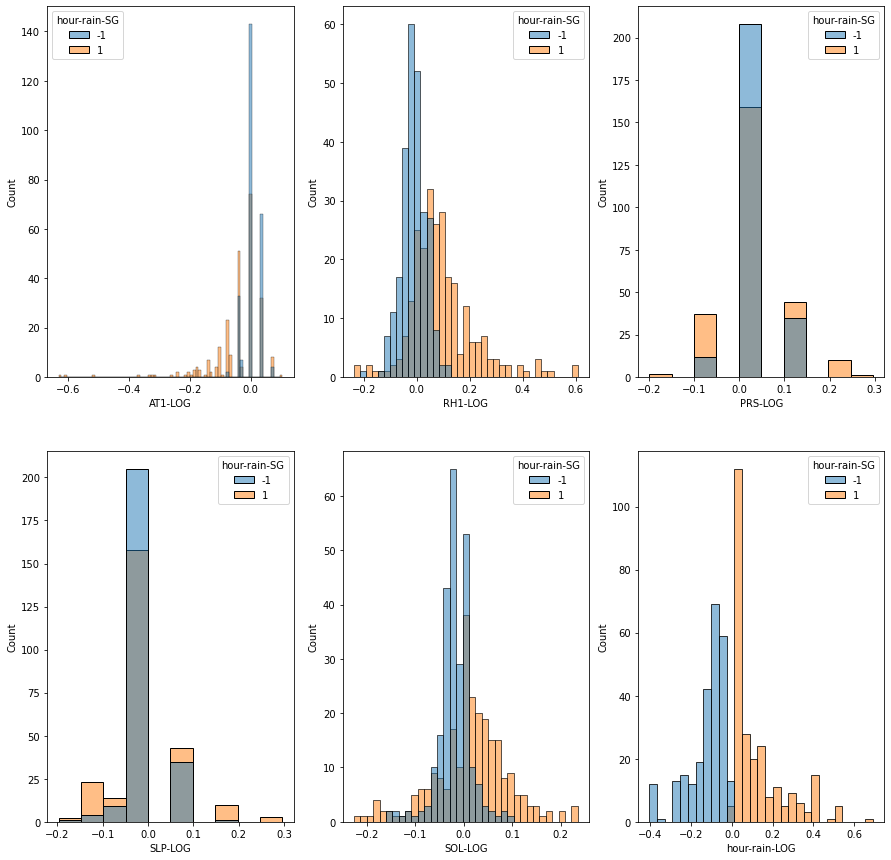

In [6]:
import matplotlib.pyplot as plt
plot_df = df.loc[df["hour-rain-LOG"] != 0]
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(15, 15))


plot_cols = [x + '-LOG' for x in cols]


count = 0
for i in range(2):
    for j in range(3):
        sns.histplot(hue=plot_df['hour-rain-SG'], x=plot_df[plot_cols[count]], ax=axes[i, j], palette="tab10")
        count += 1
fig.savefig("log-histplot.png")

AT1-LOG    False
RH1-LOG    False
SOL-LOG    False
SLP-LOG    False
PRS-LOG    False
dtype: bool


/home/akira/anaconda3/envs/p-poteka/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass discrete_features=AT1-LOG    False
RH1-LOG    False
SOL-LOG    False
SLP-LOG    False
PRS-LOG    False
dtype: bool as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


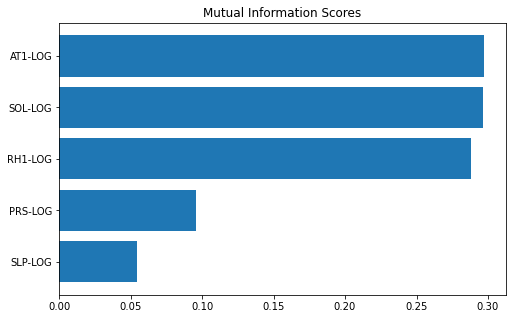

In [7]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title('Mutual Information Scores')
    
cols = ["AT1-LOG", "RH1-LOG", "SOL-LOG", "SLP-LOG", "PRS-LOG", 'hour-rain-LOG']
X = plot_df[cols].copy()
y = X.pop('hour-rain-LOG')
discrete_features = X.dtypes == int
print(discrete_features)
mi_scores = make_mi_scores(X, y, discrete_features)
plt.figure(figsize=(8, 5))
plot_mi_scores(mi_scores)
plt.savefig('mi_score.png')